In [1]:
# The next step is creating a lattice

from ScatterSim.NanoObjects import SphereNanoObject, PolydisperseNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Let's use our polydisperse sphere nanoobject since it's more realistic
# In general though, you'll want to start with simpler objects to reduce computation time
# but this one should be okay...
pargs_polysphere = dict(radius= 1, sigma_R=.04)

polysphere = PolydisperseNanoObject(SphereNanoObject, pargs_polysphere, argname='radius', argstdname='sigma_R')

In [3]:
# The peak shape
# delta is sigma of a Gaussian, and nu is FWHM of a Lorentzian
# Generally, you'll want to keep one zero and vary the other (to get a Gaussian or Lorentzian)
# but when finalizing a fit, you may want to play with intermediate values
peak = PeakShape(delta=0.03, nu=0.01) 

In [4]:
# now define your lattices
# lattices, to first order are just defined by 6 parameters:
# lattice_spacing_a, lattice_spacing_b and lattice_spacing_c (the unit vector spacings)
# alpha, beta, gamma (the angles the unit vectors make with the axes)
# We'll deal with simple lattices, so all unit vectors are aligned with x, y and z axes, and same length
lattice_spacing = 10. # 10 times radius (1 nm)
sigma_D = .06 # add a Debye-Waller factor
lat_sc = SimpleCubic([polysphere], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
lat_fcc = FCCLattice([polysphere], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
lat_bcc = BCCLattice([polysphere], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
lat_diamond = DiamondTwoParticleLattice([polysphere], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)

In [5]:
q = np.linspace(.4, 4, 1000)
# Now compute the intensity, it will take some time...
Z0_sc = lat_sc.intensity(q, peak)
Pq_sc = lat_sc.form_factor_squared_isotropic(q)

c_sc = .1

# note Gq is same for all three here (just depends on sigma_D, it's an exponential decay...)
Gq_sc = lat_sc.G_q(q)

Sq_sc = c_sc*Z0_sc/Pq_sc*Gq_sc + (1-Gq_sc)

print("Finished calculating Simple Cubic")

Z0_fcc = lat_fcc.intensity(q, peak)
Pq_fcc = lat_fcc.form_factor_squared_isotropic(q)
Gq_fcc = lat_fcc.G_q(q)

Sq_fcc = c_sc*Z0_fcc/Pq_fcc*Gq_fcc + (1-Gq_fcc)

print("Finished calculating Face Centered Cubic")

Z0_bcc = lat_bcc.intensity(q, peak)
Pq_bcc = lat_bcc.form_factor_squared_isotropic(q)
Gq_bcc = lat_bcc.G_q(q)

Sq_bcc = c_sc*Z0_bcc/Pq_bcc*Gq_bcc + (1-Gq_bcc)

print("Finished calculating Body Centered Cubic")
Z0_diamond = lat_diamond.intensity(q, peak)
Pq_diamond = lat_diamond.form_factor_squared_isotropic(q)
Gq_diamond = lat_diamond.G_q(q)

Sq_diamond = c_sc*Z0_diamond/Pq_diamond*Gq_diamond + (1-Gq_diamond)

print("Finished calculating Diamond")

Finished calculating Simple Cubic
Finished calculating Face Centered Cubic
Finished calculating Body Centered Cubic
Finished calculating Diamond


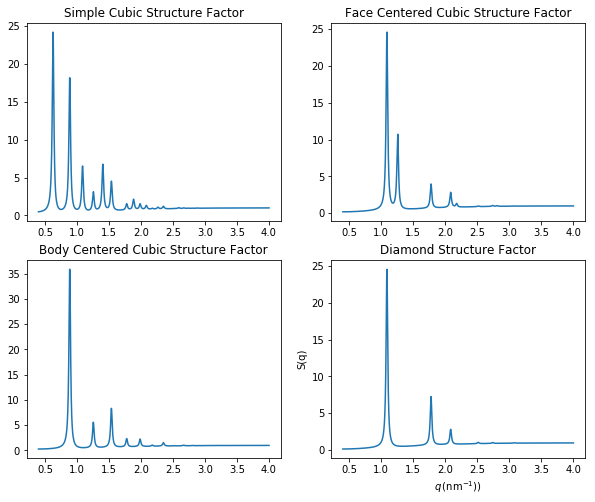

In [6]:
plt.figure(0, figsize=(10,8));plt.clf()
plt.subplot(2,2,1)
plt.title("Simple Cubic Structure Factor")
plt.plot(q, Sq_sc)
plt.subplot(2,2,2)
plt.title("Face Centered Cubic Structure Factor")
plt.plot(q, Sq_fcc)
plt.subplot(2,2,3)
plt.title("Body Centered Cubic Structure Factor")
plt.plot(q, Sq_bcc)
plt.subplot(2,2,4)
plt.title("Diamond Structure Factor")
plt.plot(q, Sq_diamond)
plt.xlabel("$q\,(\mathrm{nm}^{-1})$)")
plt.ylabel("S(q)")

In [7]:
# Same, but loglog plot (sometimes easier to see)

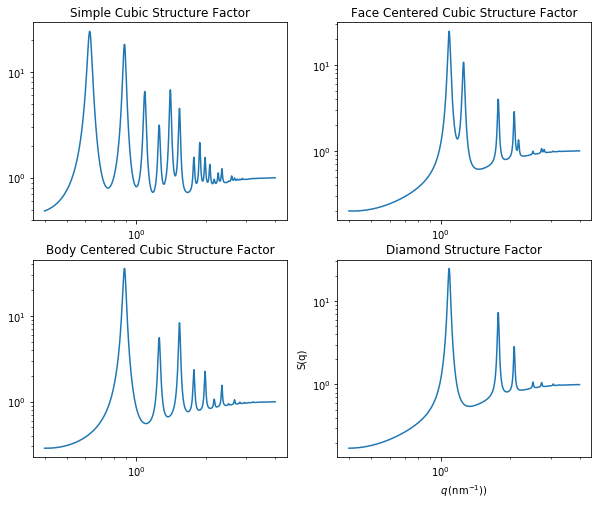

In [8]:
plt.figure(1, figsize=(10,8));plt.clf()
plt.subplot(2,2,1)
plt.title("Simple Cubic Structure Factor")
plt.loglog(q, Sq_sc)
plt.subplot(2,2,2)
plt.title("Face Centered Cubic Structure Factor")
plt.loglog(q, Sq_fcc)
plt.subplot(2,2,3)
plt.title("Body Centered Cubic Structure Factor")
plt.loglog(q, Sq_bcc)
plt.subplot(2,2,4)
plt.title("Diamond Structure Factor")
plt.loglog(q, Sq_diamond)
plt.xlabel("$q\,(\mathrm{nm}^{-1})$)")
plt.ylabel("S(q)")